In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

**Exercise 14.1** In Section 5.4, we saw that the distribution of adult weights
is approximately lognormal. One possible explanation is that the weight a
person gains each year is proportional to their current weight. In that case,
adult weight is the product of a large number of multiplicative factors:
w = w0f1f2 . . . fn
where w is adult weight, w0 is birth weight, and fi
is the weight gain factor
for year i.
The log of a product is the sum of the logs of the factors:
log w = log w0 + log f1 + log f2 + · · · + log fn
So by the Central Limit Theorem, the distribution of log w is approximately
normal for large n, which implies that the distribution of w is lognormal.
To model this phenomenon, choose a distribution for f that seems reasonable,
then generate a sample of adult weights by choosing a random value from
the distribution of birth weights, choosing a sequence of factors from the
distribution of f, and computing the product. What value of n is needed to
converge to a lognormal distribution?


In [2]:
# Solution
def GenerateAdultWeight(birth_weights, n):
    """Generate a random adult weight by simulating annual gain.

    birth_weights: sequence of birth weights in lbs
    n: number of years to simulate

    returns: adult weight in lbs
    """
    bw = random.choice(birth_weights)
    factors = np.random.normal(1.09, 0.03, n)
    aw = bw * np.prod(factors)
    return aw

In [3]:
# Solution
def PlotAdultWeights(live):
    """Makes a normal probability plot of log10 adult weight.

    live: DataFrame of live births

    
    """
    birth_weights = live.totalwgt_lb.dropna().values
    aws = [GenerateAdultWeight(birth_weights, 40) for _ in range(1000)]
    log_aws = np.log10(aws)
    thinkstats2.NormalProbabilityPlot(log_aws)
    thinkplot.Config(xlabel='standard normal values',
                     ylabel='adult weight (log10 lbs)',
                     loc='lower right')

In [6]:
import first

live, firsts, others = first.MakeFrames()

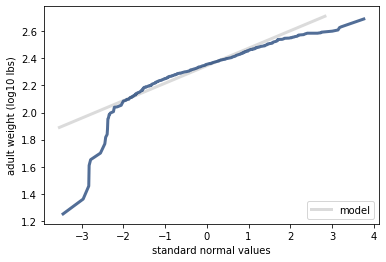

In [7]:
# Solution
PlotAdultWeights(live)

In [5]:
# Solution

# With n=40 the distribution is approximately lognormal except for the lowest weights.
# Actual distribution might deviate from lognormal because it is
# a mixture of people at different ages, or because annual weight
# gains are correlated.